## Credit Card Fraud Detection

### Before we begin

We will be using dataset from kaggle. This dataset contains very low ratio of fraud and non-fraud data.

This notebook will be using two different methods for solving this same problem. First, we will take dataset as a whole and not change the ratios of data. Second, we'll try to make ratio between both the classes same.

Lastly, we will use several models to find the most suitable model for this dataset. Models we would try are

    1. Logistic Regression
    2. SVC
    3. Decision tree
    4. Random Forest
    5. Gradient Boost
    
Let's quickly jump into the actual code.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import average_precision_score

%matplotlib inline

In [2]:
df=pd.read_csv('~/Downloads/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Data contains 28 different rows of features which are extracted using PCA and are not explained because of security reasons. What we can understand from data is Class for labels, Amount for transactions and Time for time taken for transaction.

## EDA

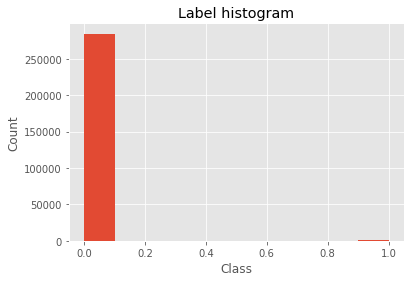

In [4]:
plt.style.use('ggplot')
plt.hist(df['Class'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Label histogram')
plt.show()

As we see number of fraud data looks too small compared to non-fraud. It only contains 0.172% of the data as fraud. Which could be a serious problem for models.

/home/vivek/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Time histogram')

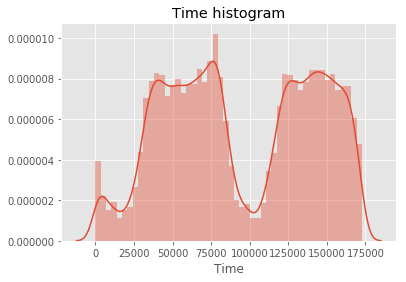

In [5]:
sns.distplot(df['Time'])
plt.title('Time histogram')

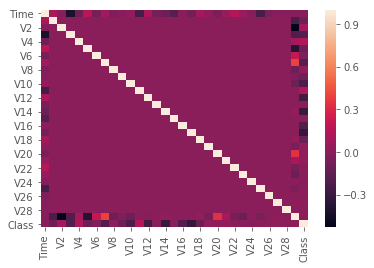

In [6]:
sns.heatmap(df.corr())
# so our data doen't look corelated from heatmap

## Creating new_df

Now we will have a new df which will contain equal ratio of fraud and nonfraud data. This is much more suitable for the machine learning models.

In [7]:
df[df['Class'] == 1].shape

(492, 31)

In [8]:
# Shuffling data before creating new_df
df = df.sample(frac=1)

# creating 2 seperate dfs
fraud_df = df[df['Class'] == 1]
nonfraud_df = df[df['Class'] == 0][:492]

new_df = pd.concat([fraud_df, nonfraud_df])

# Again shuffling 
new_df = new_df.sample(frac=1, random_state=22)

print(new_df.shape)

(984, 31)


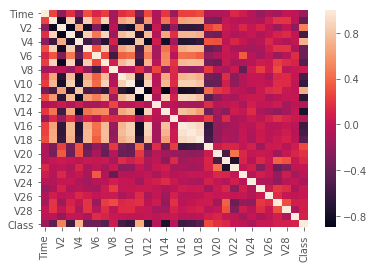

In [9]:
sns.heatmap(new_df.corr())

Wooww!! This df looks a lot more corelated than previous one.

## Creating Models

In [10]:
# Before creating models let's seperate data into X and Y
X = df.drop(['Class'], 1)
Y = df['Class']

X_new = new_df.drop(['Class'], 1)
Y_new = new_df['Class']

# Now create train_test_split for both dataframes
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
X_new_train, X_new_test, Y_new_train, Y_new_test = train_test_split(X_new, Y_new)

### Logistic Regression

In [11]:
# Unbalanced data
lreg = LogisticRegression()
lreg.fit(X_train, Y_train)
Y_pred = lreg.predict(X_train)
print("Score through AUPRC: ", average_precision_score(Y_train, Y_pred))
print("R-squared: ", lreg.score(X_train, Y_train))
Y_pred_test = lreg.predict(X_test)
print("Test Score through AUPRC: ", average_precision_score(Y_test, Y_pred_test))
print("Test score: ", lreg.score(X_test, Y_test))

Score through AUPRC:  0.39299278409552046
R-squared:  0.9989279277170479
Test Score through AUPRC:  0.38282938936853156
Test score:  0.9987921687593045


It clearly looks overfitted by the difference between both the scores. AUPRC gives a better score when data is unbalanced. Confusion matrix can't be used for such data. Let's try Logistic Regression with the small dataset. 

In [12]:
# Balanced data
lreg.fit(X_new_train, Y_new_train)
Y_pred = lreg.predict(X_new_train)
print("Score through AUPRC: ", average_precision_score(Y_new_train, Y_pred))
print("R-squared: ", lreg.score(X_train, Y_train))
Y_pred_test = lreg.predict(X_new_test)
print("Test Score through AUPRC: ", average_precision_score(Y_new_test, Y_pred_test))
print("Test score: ", lreg.score(X_new_test, Y_new_test))

Score through AUPRC:  0.9422874412057869
R-squared:  0.9625991900938649
Test Score through AUPRC:  0.9146618638680221
Test score:  0.9308943089430894


It is performing alot better than with big dataset as it's labels are balanced.

**We won't use unbalanced dataset for every model as it's big dataset and it might take hours to fit some models.**

### SVC

In [13]:
# Balanced data
svc = SVC()
svc.fit(X_new_train, Y_new_train)
Y_pred = svc.predict(X_new_train)
print("Score through AUPRC: ", average_precision_score(Y_new_train, Y_pred))
print("R-squared: ", svc.score(X_new_train, Y_new_train))
Y_pred_test = svc.predict(X_new_test)
print("Test Score through AUPRC: ", average_precision_score(Y_new_test, Y_pred_test))
print("Test score: ", svc.score(X_new_test, Y_new_test))

Score through AUPRC:  1.0
R-squared:  1.0
Test Score through AUPRC:  0.5248567239770758
Test score:  0.532520325203252


### Decision Tree

In [16]:
# Unbalanced data
dtc = DecisionTreeClassifier(random_state=20)
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_train)
print("Score through AUPRC: ", average_precision_score(Y_train, Y_pred))
print("Score: ", dtc.score(X_train, Y_train))
Y_pred_test = dtc.predict(X_test)
print("Test Score through AUPRC: ", average_precision_score(Y_test, Y_pred_test))
print("Test score: ", dtc.score(X_test, Y_test))

Score through AUPRC:  1.0
Score:  1.0
Test Score through AUPRC:  0.5713276676581077
Test score:  0.9990730597455127


In [15]:
# Balanced data
dtc.fit(X_new_train, Y_new_train)
Y_pred = dtc.predict(X_new_train)
print("Score through AUPRC: ", average_precision_score(Y_new_train, Y_pred))
print("Score: ", dtc.score(X_new_train, Y_new_train))
Y_pred_test = dtc.predict(X_new_test)
print("Test Score through AUPRC: ", average_precision_score(Y_new_test, Y_pred_test))
print("Test score: ", dtc.score(X_new_test, Y_new_test))

Score through AUPRC:  1.0
Score:  1.0
Test Score through AUPRC:  0.8923735103659686
Test score:  0.9186991869918699


### Random Forest

In [17]:
# Unbalanced data
rfc = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=14)
rfc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_train)
print("Score through AUPRC: ", average_precision_score(Y_train, Y_pred))
print("Score: ", rfc.score(X_train, Y_train))
Y_pred_test = rfc.predict(X_test)
print("Test Score through AUPRC: ", average_precision_score(Y_test, Y_pred_test))
print("Test score: ", rfc.score(X_test, Y_test))

Score through AUPRC:  1.0
Score:  0.9992415907867325
Test Score through AUPRC:  0.5494360115063955
Test score:  0.9991292379427544


In [18]:
# Balanced data
rfc = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=14)
rfc.fit(X_new_train, Y_new_train)
Y_pred = rfc.predict(X_new_train)
print("Score through AUPRC: ", average_precision_score(Y_new_train, Y_pred))
print("Score: ", rfc.score(X_new_train, Y_new_train))
Y_pred_test = rfc.predict(X_new_test)
print("Test Score through AUPRC: ", average_precision_score(Y_new_test, Y_pred_test))
print("Test score: ", rfc.score(X_new_test, Y_new_test))

Score through AUPRC:  0.9447455610179677
Score:  0.94579945799458
Test Score through AUPRC:  0.9136744056271572
Test score:  0.9227642276422764


### Gradient Boost

In [19]:
# Balanced data
gbc = GradientBoostingClassifier(n_estimators=200)
gbc.fit(X_new_train, Y_new_train)
Y_pred = gbc.predict(X_new_train)
print("Score through AUPRC: ", average_precision_score(Y_new_train, Y_pred))
print("Score: ", gbc.score(X_new_train, Y_new_train))
Y_pred_test = gbc.predict(X_new_test)
print("Test Score through AUPRC: ", average_precision_score(Y_new_test, Y_pred_test))
print("Test score: ", gbc.score(X_new_test, Y_new_test))

Score through AUPRC:  1.0
Score:  1.0
Test Score through AUPRC:  0.9105405456864872
Test score:  0.926829268292683


## Conclusion

After testing every model, Random Forest tends to be most accurate for predicting even in test set. It's also accurate AUPRC score.

If we give all models ranking based on AUPRC accuracy then it would be like:

    1. Random Forest
    2. Logistic Regression
    3. Gradient Boost
    4. Decision Tree
    5. SVC
    
SVC performed very badly with this dataset and it's accuracy is half of Random Forest.